# Image Processing


### Edge Detection

1. Difference

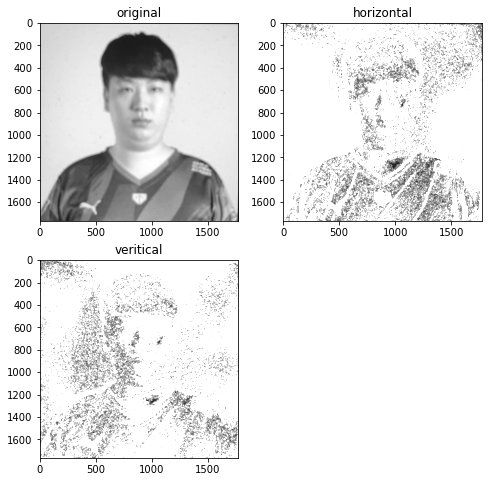

In [ ]:
import cv2
import numpy as np;
from matplotlib import pyplot as plt 

image = cv2.imread('texture.jpg',0)
m,n = image.shape[0], image.shape[1]
image2 = np.zeros(image.shape)
for i in range(1,m-1):
    for j in range(0,n-1):
            image2[i][j] = int(image[i][j])-int(image[i][j-1])
image3 = np.zeros(image.shape)
for i in range(1,n-1):
    for j in range(0,m-1):
            image3[j][i] = int(image[j][i])-int(image[j-1][i])
image2, image3 = abs(image2), abs(image3)

plt.figure(num='Difference',figsize=(8,8))

plt.subplot(2,2,1)
plt.title('original')
plt.imshow(image,cmap='gray',vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.title('horizontal')
plt.imshow(100*image2,cmap='gray',vmin=0, vmax=255)

plt.subplot(2,2,3)
plt.title('veritical')
plt.imshow(100*image3,cmap='gray',vmin=0, vmax=255)


plt.show()

2. Sobel Operator


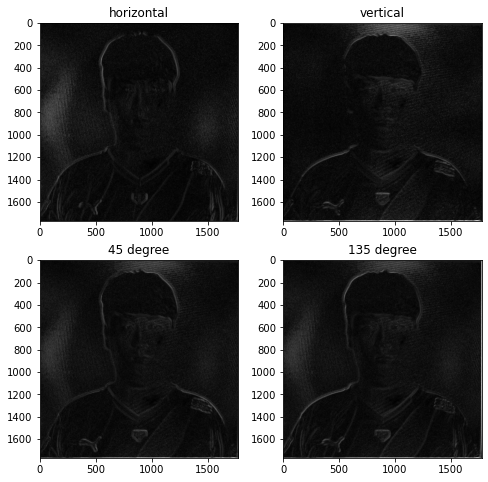

In [ ]:
import cv2
import numpy as np;
from matplotlib import pyplot as plt 
import scipy.signal

image = cv2.imread('texture.jpg',0)

def horizontalSobel(img):
    A = [[1,0,-1],[2,0,-2],[1,0,-1]]
    img2 = scipy.signal.convolve2d(img,A)
    return abs(img2)

def verticalSobel(img):
    A = [[1,2,1],[0,0,0],[-1,-2,-1]]
    img2 = scipy.signal.convolve2d(img,A)
    return abs(img2)

def degree45(img):
    A = [[0,-1,-2],[1,0,-1],[2,1,0]]
    img2 = scipy.signal.convolve2d(img,A)
    return abs(img2)

def degree135(img):
    A = [[-2,-1,0],[-1,0,1],[0,1,2]]
    img2 = scipy.signal.convolve2d(img,A)
    return abs(img2)

plt.figure(num='Sobel',figsize=(8,8))

plt.subplot(2,2,1)
plt.title('horizontal')
plt.imshow(horizontalSobel(image),cmap='gray',vmin=0,vmax=255)

plt.subplot(2,2,2)
plt.title('vertical')
plt.imshow(verticalSobel(image),cmap='gray',vmin=0,vmax=255)

plt.subplot(2,2,3)
plt.title('45 degree')
plt.imshow(degree45(image),cmap='gray',vmin=0,vmax=255)

plt.subplot(2,2,4)
plt.title('135 degree')
plt.imshow(degree135(image),cmap='gray',vmin=0,vmax=255)

plt.show()


3. Laplce Operator

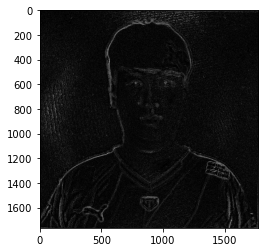

In [ ]:
import cv2
import numpy as np;
from matplotlib import pyplot as plt 
import scipy.signal

image = cv2.imread('texture.jpg',0)
L = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
image = cv2.medianBlur(image, 7) 
img_laplace = cv2.Laplacian(image,-1,1,5)

plt.imshow(img_laplace,cmap='gray',vmin='0',vmax='255')

plt.show()


### Intensity modification

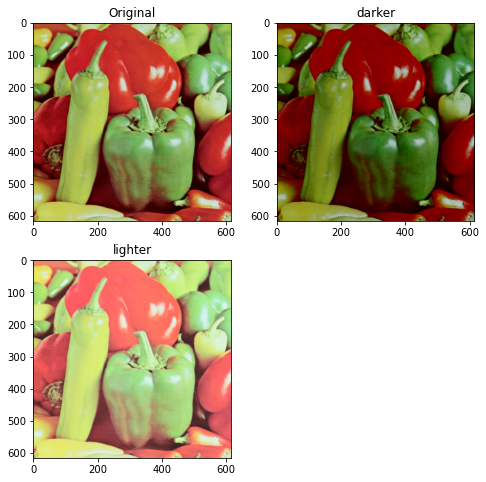

In [ ]:
import cv2
import numpy as np;
image = cv2.imread('peppers.png')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)
m,n = hsv.shape[0],hsv.shape[1]
darker = hsv.copy()
lighter = hsv.copy()


darker[:,:,0] = ((darker[:,:,0]/255)**2)*255
lighter[:,:,0] = ((lighter[:,:,0]/255)**0.5)*255

darker = cv2.cvtColor(darker,cv2.COLOR_YCR_CB2BGR)
lighter = cv2.cvtColor(lighter,cv2.COLOR_YCR_CB2BGR)
plt.figure(num='Intensity',figsize=(8,8))

plt.subplot(2,2,1) 
plt.title('Original')
plt.imshow(image[:,:,[2,1,0]],cmap='gray',vmin='0',vmax='255')

plt.subplot(2,2,2) 
plt.title('darker')
plt.imshow(darker[:,:,[2,1,0]],cmap='gray',vmin='0',vmax='255')

plt.subplot(2,2,3) 
plt.title('lighter')
plt.imshow(lighter[:,:,[2,1,0]],cmap='gray',vmin='0',vmax='255')

plt.show()

### Similarity Measurements


In [ ]:
import numpy as np
import cv2

original = cv2.imread('texture.jpg')
changed = cv2.imread('texture2.jpg')


def MSE(y,x):
    y,x = y.astype(np.uint64),x.astype(np.uint64)
    return np.mean((y-x)**2)

def NRMSE(y,x):
    y,x = y.astype(np.uint64),x.astype(np.uint64)
    xs = np.mean(x**2)
    return np.sqrt(MSE(y,x)/xs)

def PSNR(y,x):
    y,x = y.astype(np.uint64),x.astype(np.uint64)
    return np.log10((255*255)/MSE(y,x))*10

print('MSE:',MSE(original,changed))
print('NRMSE:',NRMSE(original,changed))
print('PSNR:',PSNR(original,changed))



MSE: 917.0688054875228
NRMSE: 0.13776768750833834
PSNR: 18.50678439895222


In [32]:
def SSIM(y,x):
    y,x = y.astype(np.uint64),x.astype(np.uint64)
    ux,uy = np.mean(x),np.mean(y)
    varx,vary = np.var(x),np.var(y)
    cov = np.mean(np.multiply(x,y)) - ux - uy
    L = 255
    c = np.sqrt(1/255)
    fac1 = 2*ux*uy + (c*L)**2
    fac2 = 2*cov + (c*L)**2
    fac3 = ux**2 + uy**2 + (c*L)**2
    fac4 = varx**2 + vary**2 + (c*L)**2
    return fac1*fac2/(fac3*fac4)

print("SSIM : ", SSIM(original,changed))

SSIM :  0.002336655214288791


/var/folders/_s/qy_32wlx75bb90myz6qtnzbr0000gn/T/ipykernel_67558/2303290287.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, wave_data = wavfile.read('/Users/xuyouwei/Desktop/DISP/Example.wav')


<function matplotlib.pyplot.show(close=None, block=None)>

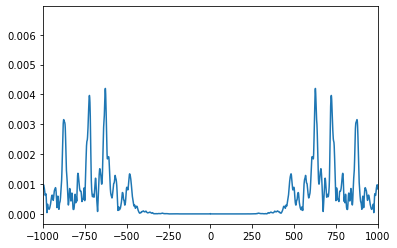

In [ ]:
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
fs, wave_data = wavfile.read('Example.wav')
num_frame = len(wave_data)
n_channel = int(wave_data.size/num_frame)

fft_data = abs(fft(wave_data[:,0]))/fs
fft_data = fft_data/2**15
n0 = int(np.ceil(num_frame/2))
fft_data1 = np.concatenate([fft_data[n0:num_frame],fft_data[0:n0]])
freq = np.concatenate([range(n0-num_frame,0),range(0,n0)])*fs/num_frame
plt.plot(freq,fft_data1)
plt.xlim([-1000,1000])
plt.show
